In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df=pd.read_csv('credit_card_fraud_10k.csv')
df

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,350.91,22,Food,0,0,99,4,37,0
9996,9997,410.04,5,Clothing,0,0,70,3,25,0
9997,9998,527.75,21,Electronics,0,0,44,2,45,0
9998,9999,91.20,2,Electronics,0,0,38,0,37,0


In [2]:
df.drop(columns=["transaction_id","location_mismatch","device_trust_score","velocity_last_24h"],inplace=True)
df

,amount,transaction_hour,merchant_category,foreign_transaction,cardholder_age,is_fraud
0,84.47,22,Electronics,0,40,0
1,541.82,3,Travel,1,64,0
2,237.01,17,Grocery,0,61,0
3,164.33,4,Grocery,0,34,0
4,30.53,15,Food,0,44,0
...,...,...,...,...,...,...
9995,350.91,22,Food,0,37,0
9996,410.04,5,Clothing,0,25,0
9997,527.75,21,Electronics,0,45,0
9998,91.20,2,Electronics,0,37,0


In [3]:
df.describe()

,amount,transaction_hour,foreign_transaction,cardholder_age,is_fraud
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.949849,11.593300,0.097800,43.468700,0.015100
std,175.392827,6.922708,0.297059,14.979147,0.121957
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,50.905000,6.000000,0.000000,30.000000,0.000000
50%,122.095000,12.000000,0.000000,44.000000,0.000000
75%,242.480000,18.000000,0.000000,56.000000,0.000000
max,1471.040000,23.000000,1.000000,69.000000,1.000000


<Axes: xlabel='is_fraud', ylabel='count'>

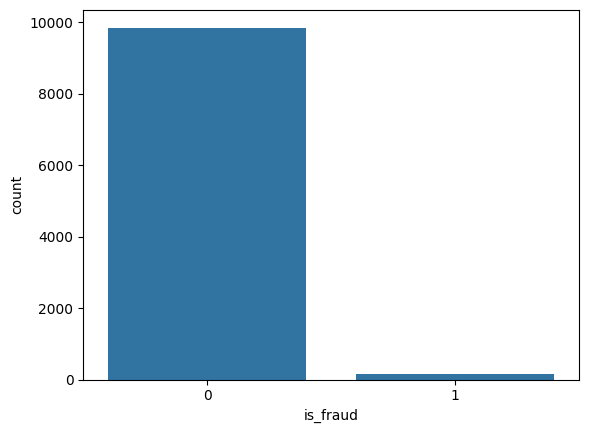

In [4]:
sns.countplot(x='is_fraud',data=df)

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['merchant_category']=label_encoder.fit_transform(df['merchant_category'])
df

,amount,transaction_hour,merchant_category,foreign_transaction,cardholder_age,is_fraud
0,84.47,22,1,0,40,0
1,541.82,3,4,1,64,0
2,237.01,17,3,0,61,0
3,164.33,4,3,0,34,0
4,30.53,15,2,0,44,0
...,...,...,...,...,...,...
9995,350.91,22,2,0,37,0
9996,410.04,5,0,0,25,0
9997,527.75,21,1,0,45,0
9998,91.20,2,1,0,37,0


<Axes: xlabel='merchant_category', ylabel='count'>

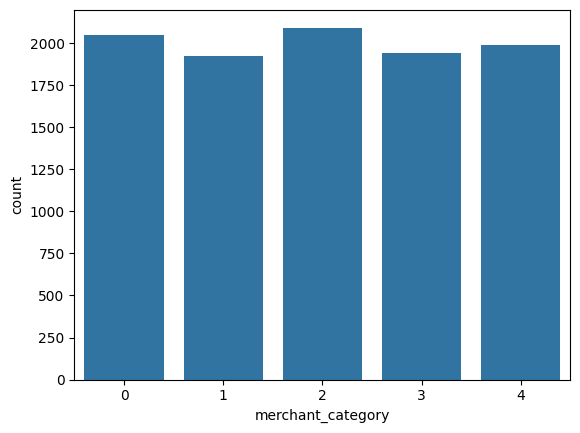

In [6]:
sns.countplot(x='merchant_category',data=df)

In [7]:
df

,amount,transaction_hour,merchant_category,foreign_transaction,cardholder_age,is_fraud
0,84.47,22,1,0,40,0
1,541.82,3,4,1,64,0
2,237.01,17,3,0,61,0
3,164.33,4,3,0,34,0
4,30.53,15,2,0,44,0
...,...,...,...,...,...,...
9995,350.91,22,2,0,37,0
9996,410.04,5,0,0,25,0
9997,527.75,21,1,0,45,0
9998,91.20,2,1,0,37,0


In [8]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)

df = X_res
df['is_fraud'] = y_res
df

,amount,transaction_hour,merchant_category,foreign_transaction,cardholder_age,is_fraud
0,84.470000,22,1,0,40,0
1,541.820000,3,4,1,64,0
2,237.010000,17,3,0,61,0
3,164.330000,4,3,0,34,0
4,30.530000,15,2,0,44,0
...,...,...,...,...,...,...
19693,364.989891,2,1,0,43,1
19694,108.130561,2,1,0,18,1
19695,398.190047,1,3,0,61,1
19696,56.866926,0,2,0,47,1


<Axes: xlabel='is_fraud', ylabel='count'>

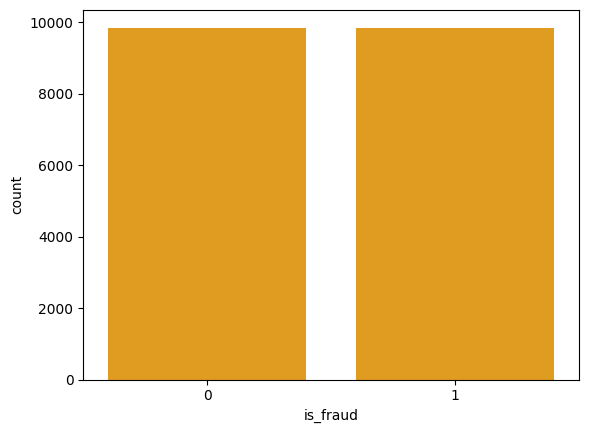

In [11]:
import seaborn as sns
sns.countplot(x='is_fraud',data=df,color='orange')

In [12]:
df.isnull().sum()

amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
cardholder_age         0
is_fraud               0
dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
sc=StandardScaler()
x=sc.fit_transform(X)
model=KNeighborsClassifier(n_neighbors=5)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy

0.9106598984771573

In [35]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print(score.mean())

0.9111584016660158


In [37]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1709,  305],
       [  47, 1879]])

<Axes: >

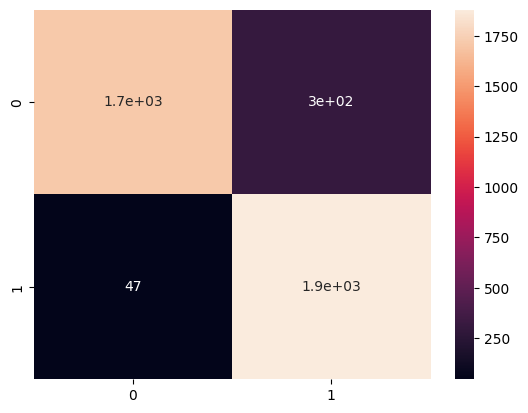

In [38]:
sns.heatmap(cm,annot=True)

In [40]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2014
           1       0.86      0.98      0.91      1926

    accuracy                           0.91      3940
   macro avg       0.92      0.91      0.91      3940
weighted avg       0.92      0.91      0.91      3940



In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3,5,10,15,20],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan','minkowski']
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best CV score: 0.9220712504450284
